<module 'matplotlib.pyplot' from 'C:\\Users\\sergi\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

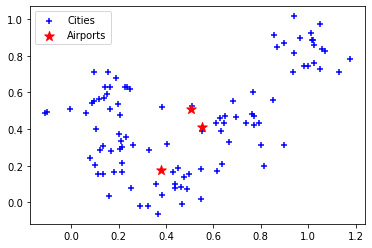

In [1]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [11]:
airports - .1 * np.array([(1, 1), (2, 3), (4, 2)])

array([[ 0.40477689,  0.40807762],
       [ 0.3519267 ,  0.11053541],
       [-0.02175616, -0.02594028]])

In [20]:
cities_to_list = np.array(list(cities))

In [22]:
airports = np.array(airports)

In [23]:
distance = (cities_to_list[0] - airports[0]).T.dot(cities_to_list[0] - airports[0])

In [24]:
distance

0.2850173458790948

In [29]:
def find_closest_airports(cities, aiports):
    idx = np.array([0 for _ in range(len(cities))])
    for i in range(len(cities)):
        city_i = cities[i]
        min_distance = float('inf')
        for k in range(len(airports)):
            kth_airport = airports[k]
            distance = (city_i - kth_airport).T.dot(city_i - kth_airport)
            if distance < min_distance:
                min_distance = distance
                idx[i] = k
    return idx

In [31]:
idx = find_closest_airports(cities_to_list, airports)

In [36]:
elements = cities_to_list[idx == 2]

In [43]:
len(cities_to_list[idx == 2])

41

In [53]:
def objective_score(cities, airports):
    score = 0
    idx = find_closest_airports(cities, airports)
    for i in range(len(airports)):
        elements = cities[idx == i]
        for element in elements:
            score += (element - airports[i]).T.dot(element - airports[i])
    return score

In [54]:
objective_score(cities_to_list, airports)

13.130477667172634

In [95]:
def gradient(cities, airports):
    idx = find_closest_airports(cities, airports)
    gradient_of_f = [0 for _ in range(len(airports))]
    for i in range(len(airports)):
        gradient_xi = 0
        gradient_yi = 0
        elements = cities[idx == i]
        gradient_xi = 2 * (np.sum(airports[i] - elements[:, 0]))
        gradient_yi = 2 * (np.sum(airports[i] - elements[:, 1]))
        gradient_of_f[i] = (gradient_xi, gradient_yi)
    return np.array(gradient_of_f)

In [96]:
gradient(cities_to_list, airports)

ValueError: operands could not be broadcast together with shapes (2,) (40,) 

In [98]:
elements[:, 0].shape

(41,)